### 基本知识

- 灰度图像的存储方式：
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzpudsb595j20gc05u0uk.jpg)
- 多通道图像存储方式
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzpueh59f1j20ln05cgno.jpg)

OpenCV 中的通道存储为 BGR

#### 像素值的存储方式
- RGB 模式，显示设备采用这种模式
- HSV、HLS 将颜色分解成色调、饱和度和亮度/明度
- YCrCb 在 JPEG 图像格式中广泛使用
- CIE L*a*b* 是一种感知上均匀的颜色空间，它适用来度量两个颜色之间的距离

### 图片的基本操作
学习目标：
- 访问像素值并修改
- 访问图片属性
- 设置图像区域（ROI）
- 拆分、合并图像

这一节主要大部分涉及 Numpy 库的使用

#### 访问并且修改像素值

In [1]:
import cv2
import numpy as np

In [2]:
# 加载一个彩色图
img = cv2.imread("img.jpg")
img.shape

(150, 220, 3)

In [3]:
px = img[100, 100]
print(px)
blue = img[100, 100, 0]
print(blue)

[ 85 180 173]
85


In [4]:
# 修改特定的像素
img[100, 100] = [255, 255, 255]
print(img[100, 100])

# 这种修改每个像素的做法效率很低

[255 255 255]


**最好使用下面这种方法**

In [5]:
# 获取 RED 通道值
img.item(10, 10, 1)

# 修改
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

100

#### 颜色空间缩减

若是单通道的像素，像素有 256（0-255）个值，若是三通道，则颜色数就更多（一千六百多万种），如此多的颜色进行处理，会对算法的性能造成影响。这些颜色中，有代表性的颜色只是小部分。

颜色空间缩减（color space reduction）可以大大降低运算复杂度，具体做法是：
- 0-9 范围的像素值为 0；
- 10-19 范围像素值为 10；
- 以此类推

算法实现步骤：
1. 遍历图像矩阵的每个像素
2. 根据公式：$I_{new} = (I_{old} / 10) * 10$

In [6]:
img = cv2.imread("img.jpg", 0) # img.shape = 150*220
img_new = np.array([i for i in map(lambda x:(x//10)*10, img)])

cv2.imshow("img", img)
cv2.imshow("img_new", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 统计不同元素的个数
np.unique(img),np.unique(img_new)

(array([ 21,  26,  28,  33,  34,  35,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
        187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208

运行结果，从肉眼来看，差别不大
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzq97b90gzj20ck052759.jpg)

#### 获取图像的属性

In [7]:
img;

In [8]:
img.shape
# 若是彩色图像，则返回元组 1*3
# 若是灰色图像，则返回元组 1*2 只有行和列
# 此方法可以用来判断是否为彩色图像

(150, 220)

In [9]:
# 所有像素的总和即上面的元组值相乘
img.size

33000

In [10]:
# 图像的数据类型
img.dtype

dtype('uint8')

**img.dtype 在调试时非常重要，因为大部分错误是因为无效的数据类型引起的**

#### 感兴趣区域（ROI）
该部分的功能是对图像的一小部分区域进行处理（我们感兴趣的那部分），可以减少处理时间，增加精度，给图像处理带来便利。

In [11]:
img = cv2.imread("messi5.jpg")
cv2.imshow("image_init", img)
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
cv2.imshow("image_roi", img)
k = cv2.waitKey(0) & 0xFF
if k == 27:
    cv2.destroyAllWindows()

本例是对找到图像中球的位置，并复制一个放在另外一个地方，注意看的话，你会发现复制的球是一个矩形，看起来并不协调？
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzlms00px6j20uu0aagw9.jpg)

#### 拆分、合并图像通道

In [12]:
# 拆分每个通道
b,g,r = cv2.split(img) # 或者 b = img[:, :, 0]
# 把各个通道合并起来
img = cv2.merge((b,g,r))


In [13]:
# 让红色通道置零，可以不用拆分红色通道，直接置零
img[:, :, 2] = 0

`cv2.split()` 对系统来说开销很大，所以只在需要使用的时候再使用，使用 Numpy 索引的方法更有效

#### 为图像创建边框(填充)
`cv2.copyMakeBorder()`: 可以为图像创建边框它在 **卷积运算，零填充**等方面有更多的应用

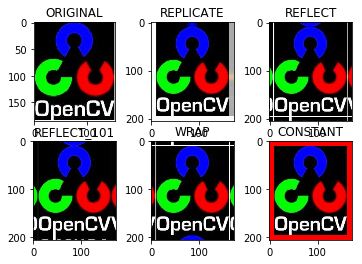

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255, 0, 0]

img1 = cv2.imread('opencv-logo.png')

replicate = cv2.copyMakeBorder(
    img1, 10, 10, 10, 10, cv2.BORDER_REPLICATE)  # 最后一个元素的复制
reflect = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT)  # 边框的镜面
reflect101 = cv2.copyMakeBorder(
    img1, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)  # 同上，但有细微变化
wrap = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_WRAP)
# 添加一个固定颜色的边框,因为 matpltlib 和 opencv 颜色显示不一样，所有图标的红色和蓝色互换了
constant = cv2.copyMakeBorder(
    img1, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)


plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

![](https://ws1.sinaimg.cn/large/acbcfa39ly1g0n8yz2n31j20ap072tal.jpg)

函数说明

`copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]]) -> dst`
- src: 输入图片
- top, bottom, left, right: 上下左右的宽度
- borderType: 边框类型，多个可以选择 [参见](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops)

#### 更多资料
[本节原文](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops)

### 图像对比度、亮度值调整
学习目标：
- 用 OpenCV 进行图像对比度、亮度的动态调整

#### 理论依据
一般的图像处理算子都是一个函数，它接受一个或多个输入图像，并产生输出图像。算子的一般形式：$g(x) = h(f(x))$ 或者 $g(x) = h(f_0(x)···f_n(x))$

图像亮度和对比度的调整操作，属于图像操作中的**点操作**。点操作的特点：仅仅根据输入像素值（有时可加上某些全局信息或参数），来计算相应的输出像素值。这类算子包括：亮度（brightness）、对比度（contrast）调整、颜色校正（colorcorrection）、变换（transformations）。

常见的点操作（或说点算子）是乘上一个常数（对应对比度发调节）和加上一个常数（对应亮度的调节）。公式为：$g(x)=a*f(x)+b$
各个参数的含义：
- 参数 f(x) 表示源图像像素
- 参数 g(x) 表示输出图像像素
- 参数 a （需要满足 a>0 ）被称为增益（gain），控制图像的对比度
- 参数 b 称为偏置（bias），控制图像的亮度

公式改写：$g(i, j)=a*f(i, j)+b$
即对图像的 i 行 j 列的像素进行操作。（对所有的像素进行操作）

#### 案例（利用轨迹条调节图像的亮度和对比度）

In [16]:
import numpy as np
import cv2
from skimage import img_as_int


def nothing(x):
    pass

# 对比度和亮度调节函数
def adjust_bright_contrast(img, a=1, b=0):
    new_img = np.zeros(img.shape, dtype=img.dtype)
    for b in range(img.shape[0]):
        for g in range(img.shape[1]):
            for r in range(img.shape[2]):
                new_img[b, g, r] = np.clip(a*img[b, g, r]+b, 0, 255)
    return new_img

# 使用轨迹条应该先创建一个窗口，因为
cv2.namedWindow("image") 
cv2.createTrackbar("bright", "image", 0, 300, nothing)
cv2.createTrackbar("contrast", "image", 0, 255, nothing)


img = cv2.imread("img.jpg")
new_img = np.zeros(img.shape, dtype=img.dtype)

while(1):
    
    cv2.imshow("image", new_img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    brightness = cv2.getTrackbarPos("bright", "image")
    contrast = cv2.getTrackbarPos("contrast", "image")
    new_img[:] = adjust_bright_contrast(img, brightness*0.01, contrast)
    
cv2.destroyAllWindows()

运行结果：![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzr0blkcm3j211t08g3zi.jpg)
这个方式运行起来很慢，因为里面有三层循环

### 离散傅立叶变换

待学习

### 图像的算术运算
学习目标：
- 图像的加法、减法、位运算
- cv2.add(), cv2.addWeighted()

#### 图像加法
`cv2.add()` 使用该函数操作是 Numpy 操作，两个图片应该要有一样的数据类型和深度，否则第二个图像只能是标量值。

In [17]:
x = np.uint8([250])
y = np.uint8([10])
z = np.uint8([255])
print("opencv add operation:", cv2.add(x, y)) # 250+10 = 260 => 255 
print("opencv sub operation:", cv2.subtract(x, z)) # 250-255 = -5 => 0

print("numpy add operation:", x+y) # 250+10 = 260 % 256 = 4
print("numpy sub operation:", x-z) # 250-255 = -5 % 256 = 251

opencv add operation: [[255]]
opencv sub operation: [[0]]
numpy add operation: [4]
numpy sub operation: [251]


OpenCV 运算和 Numpy 运算有区别：OpenCV 是饱和运算，即相加最大只能是 255 ,相减最小只能是 0。Numpy 是模运算。见上面注释。

**最好使用 OpenCV 中的 add 进行运算**

#### 图像融合
`cv2.addWeighted()` 两张图片以权重进行融合，使其给人一种混合或透明的感觉。图片按以下公式运算
$g(x) = (1 - \alpha)f_0(x) + \alpha f_1(x)$

In [18]:
img1 = cv2.imread("ml.png")
img2 = cv2.imread("opencv-logo.png")

dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

`addWeighted` 运算公式为： $dst = \alpha*img1 + \beta*img2 + \gamma$

![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzonysvg4zj20cz069q60.jpg)

轨迹条版本

In [3]:
import cv2
img1 = cv2.imread("ml.png")
img2 = cv2.imread("opencv-logo.png")

def nothing(x):
    pass

cv2.namedWindow("image")
cv2.createTrackbar("alpha", "image", 0, 100, nothing)
dst = np.zeros(img1.shape, dtype=img1.dtype)

while(1):
    cv2.imshow('image', dst)
    alpha  = cv2.getTrackbarPos("alpha", "image")
    dst = cv2.addWeighted(img1, alpha*0.01, img2, 1 -alpha*0.01, 0)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()

#### 位运算
包括 AND、OR、NOT 和 XOR 操作。它们在提取图像的任何部分、定义和处理非矩形 ROI 时非常有用。

##### AND 运算

In [20]:
# 画矩形
Rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(Rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", Rectangle)
cv2.waitKey(0)

# 画圆形
Circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(Circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", Circle)
cv2.waitKey(0)

bit_and = cv2.bitwise_and(Rectangle, Circle)
cv2.imshow("bit_and", bit_and)
cv2.waitKey(0)

"""
sub = cv2.subtract(Rectangle, Circle)
cv2.imshow("sub", sub)
cv2.waitKey()
"""

cv2.destroyAllWindows()

x = np.uint8([10])
y = np.uint8([20])
z = np.uint8([10])

cv2.bitwise_and(x, y), cv2.bitwise_and(x, z)

(array([[0]], dtype=uint8), array([[10]], dtype=uint8))

运行结果
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzp33zb24wj20pi09cq34.jpg)

##### OR 运算

In [21]:
# 画矩形
Rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(Rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", Rectangle)
cv2.waitKey(0)

# 画圆形
Circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(Circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", Circle)
cv2.waitKey(0)

bit_or = cv2.bitwise_or(Rectangle, Circle)
cv2.imshow("bit_or", bit_or)
cv2.waitKey(0)


add = cv2.add(Rectangle, Circle)
cv2.imshow("add", add) 
cv2.waitKey(0)

cv2.destroyAllWindows()
x = np.uint8([10]) # 0000 1010
y = np.uint8([20]) # 0001 0100 
z = np.uint8([40]) # 0010 1000

print(cv2.bitwise_or(x, y)) # 0001 1110 => 30
print(cv2.bitwise_or(x, z)) # 0010 1010 => 42

[[30]]
[[42]]


**OR 运算和 `cv2.add()` 结果一致?**

运行结果
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzpm7yby2uj20xv09574j.jpg)

##### XOR（异或）运算

In [22]:
# 画矩形
Rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(Rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", Rectangle)
cv2.waitKey(0)

# 画圆形
Circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(Circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", Circle)
cv2.waitKey(0)

bit_xor = cv2.bitwise_xor(Rectangle, Circle)
cv2.imshow("bit_xor", bit_xor)
cv2.waitKey(0)
cv2.destroyAllWindows()

运行结果
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzp3acatsgj20pl09egls.jpg)

##### NOT 运算

In [23]:
# 画矩形
Rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(Rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", Rectangle)
cv2.waitKey(0)

# 画圆形
Circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(Circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", Circle)
cv2.waitKey(0)

bit_not = cv2.bitwise_not(Rectangle, Circle)
cv2.imshow("bit_not", bit_not)
cv2.waitKey(0)
cv2.destroyAllWindows()

运行结果
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzp3citxwrj20pn09gwem.jpg)

##### 综合例程

mask：图像掩模

In [24]:
# 加载图片
img1 = cv2.imread("messi5.jpg")
img2 = cv2.imread("opencv-logo.png")

print(img1.shape, img2.shape)

# 把 OpenCV logo 放在图片的左上角，创建一个 ROI 大小和 logo 图像一致
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]
print("roi.shape:", roi.shape)
cv2.imshow("roi", roi)
cv2.waitKey(0)

# 灰度图
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2.imshow("img2gray", img2gray)
cv2.waitKey(0)

ret, mask = cv2.threshold(img2gray, 25, 255, cv2.THRESH_BINARY)
# 解释：若图片 im2gray 的像素值小于 25，则像素置 0（黑），否则置 255（白）
# ret ：得到的阈值，mask：阈值化后的图像
print("ret", ret)
cv2.imshow("mask", mask)
cv2.waitKey(0)

mask_inv = cv2.bitwise_not(mask)
# 把 mask 图像的白色像素变为黑色，黑色像素变为白色
cv2.imshow("mask_inv", mask_inv)
cv2.waitKey(0)


# 将 img1 中的 ROI 的 logo 区域涂黑
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
cv2.imshow("img1_bg", img1_bg)
cv2.waitKey(0)
# plt.imshow(img1_bg)

# 只提取 logo 图像中的 logo
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
cv2.imshow("img2_fg", img2_fg)
cv2.waitKey(0)


# 将 ROI 区域与 logo 图标运算
dst = cv2.add(img1_bg, img2_fg)
cv2.imshow("dst", dst)
cv2.waitKey(0)


img1[0:rows, 0:cols] = dst

cv2.imshow("res", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(342, 548, 3) (186, 152, 3)
roi.shape: (186, 152, 3)
ret 25.0


运行结果
![](https://ws1.sinaimg.cn/large/acbcfa39gy1fzpvb58iwnj20q20gv16o.jpg)

要将两张图放在一起，且都是原来的图像，如上图所示，将 OpenCV logo （img2）放在 img1 上面，巧妙的利用黑色像素（0）。
如何将两个图一原来的图像进行重叠：
1. 创建一个 ROI 区域（ROI 区域来自底图，如上面的例子的 img1）
2. 将 logo 之外的像素置 0 （就是背景是纯黑色），如上图的 img2_fg
3. 将 ROI 区域上要放置 logo 的位置置 0，如上图的 img1_bg
4. 将 2、3 步得到的图像相加（ cv2.add() ）
5. 将第 4 步得到的图像将 img1 的区域替换掉

#### 练习（用函数实现图像的无缝拼接）

In [25]:
def pinjie(img1, img2, x=0, y=0):
    """
    img1: 底图
    img2: 上方的图
    x, y:选择放置的位置
    """
    # 创建一个 ROI 
    rows, cols, channel = img2.shape
    roi = img1[x:x+rows, y:y+cols]
    img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 25, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)    
    roi = cv2.bitwise_and(roi, roi, mask=mask_inv) 
    img2_bg = cv2.bitwise_and(img2, img2, mask=mask)
    img1[x:x+rows, y:y+cols] = cv2.add(roi, img2_bg)
    return img1


img1 = cv2.imread("messi5.jpg")
img2 = cv2.imread("opencv-logo.png")
dst = pinjie(img1, img2, 100, 100)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 更多资料
[本节原文](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html) 

[Python下opencv使用笔记（四）（图像的阈值处理）](https://blog.csdn.net/on2way/article/details/46812121)

### 性能评估和改进技术
图像处理中，不仅需要准确，更需要快速的方法进行处理。
学习目标：
- 评估代码的性能
- 提升代码性能的小技巧
- cv2.getTickCount, cv2.getTickFrequency

`time` 模块可以测量执行时间；
`profile` 模块有助于获得关于代码的详细报告，比如代码中每个函数花费了多少时间、调用了多少次等等。

#### 使用 OpenCV 衡量性能
- `cv2.getTickCount ` 在代码前后使用可以得到代码的运行时间
- `cv2.getTickFrequency` 返回时钟周期的频率，即每秒的时钟周期数

In [26]:
img1 = cv2.imread('messi5.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
e2 - e1, t

(8315303, 0.8315303)

python 中的 `time` 模块也可以实现该功能

#### OpenCV 中的默认优化
OpenCV 的许多函数都是使用SSE2、AVX等优化的。它还包含未优化的代码。因此，如果我们的系统支持这些特性，我们应该利用它们(几乎所有现代处理器都支持它们)。它在编译时默认启用。OpenCV 在启用时运行优化后的代码，否则运行未优化的代码。使用 `cv2.useoptimization()`来检查它是否启用/禁用，使用
`cv2.setuseoptimization()`来启用/禁用它。

In [27]:
# 检查优化器是否开启
cv2.setUseOptimized(True)
cv2.useOptimized()

True

In [28]:
img = cv2.imread("messi5.jpg")
%timeit res = cv2.medianBlur(img,49)

31.8 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
# 设置优化器的开关
cv2.setUseOptimized(False)

In [30]:
cv2.useOptimized()

False

In [31]:
%timeit res = cv2.medianBlur(img,49)

30.9 ms ± 448 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


可以看出使用优化器前后的运行性能

#### IPython 性能测试
测试一下下面几个计算平方的方法哪个更好。
例子：
`x = 5; y = x**2`、`x = 5; y = x*x`、`x = np.uint8([5]); y = x*x`、`y = np.square(x)` 可以使用 `%timeit` 进行测试

In [32]:
x = 5

In [33]:
%timeit y = x**2

505 ns ± 18 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
%timeit y = x*x

77.5 ns ± 1.98 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [35]:
z = np.uint8([5])
%timeit y=z*z

709 ns ± 57.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [36]:
%timeit y=np.square(z)

674 ns ± 66.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


`y = x*x` 比 Numpy 运算快不少

Python 标量操作比 Numpy 标量操作快。因此对于包含一个或两个元素的操作，Python 标量优于 Numpy 数组。当数组的大小稍微大一点时，Numpy 就更有优势。

In [37]:
# 比较 cv2.countNonZero() 和 np.count_nonzero() 的性能
%timeit z = cv2.countNonZero(img[:,:, 0]) # 该函数只能计算单通道的图片

269 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%timeit z = np.count_nonzero(img[:,:, 0])

677 µs ± 54.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 性能优化技术
首先尝试以一种简单的方式实现该算法。一旦开始工作，对其进行分析，找到瓶颈并对其进行优化。
- 尽量避免循环，特别是 2/3 重的循环
- 最大限度地向量化算法/代码，因为 Numpy 和 OpenCV 是针对向量操作进行优化的。
- 利用缓存一致性
- 除非必要，不然尽量不要对数组进行复制，数组复制的开销很大

即使在执行了所有这些操作之后，如果代码仍然很慢，或者不可避免地要使用大型循环，那么可以使用其他库，比如Cython来加快速度。

#### 更多资料
[Python Optimization Techniques](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)、Scipy Lecture Notes - [Advanced Numpy](http://scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy)
time profile 模块